In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("full_df.csv")
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


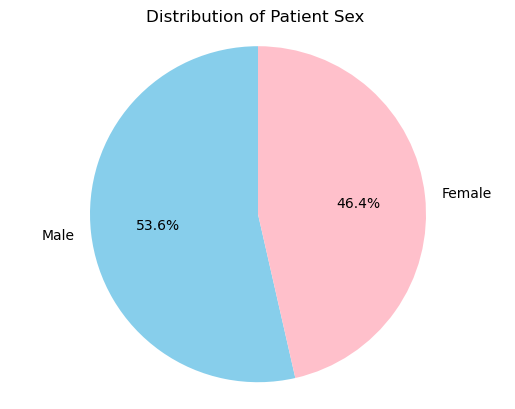

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = df['Patient Sex'].value_counts()
colors=['skyblue','pink']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,colors=colors)

plt.title('Distribution of Patient Sex ')

plt.axis('equal')
plt.show()

In [4]:
df['Patient Age'].value_counts()

Patient Age
56    294
60    285
54    277
62    265
65    252
     ... 
15      2
19      2
14      2
91      2
17      2
Name: count, Length: 75, dtype: int64

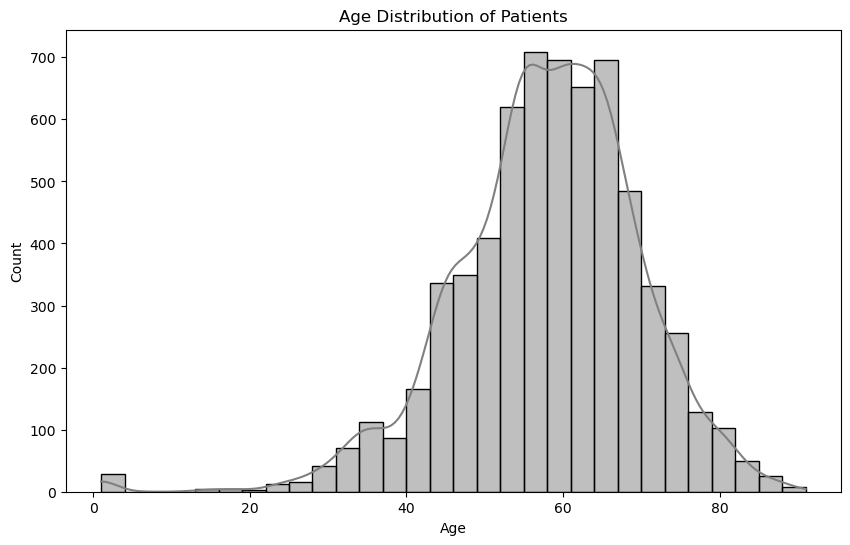

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Patient Age'], bins=30, kde=True, color='gray')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


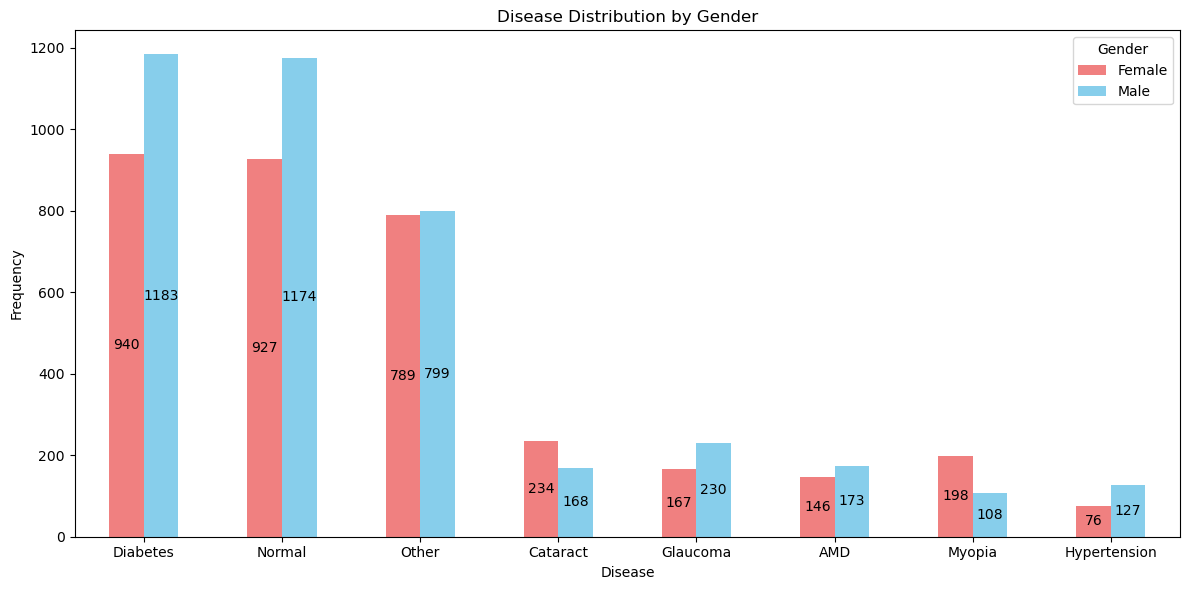

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Map abbreviated disease names to full names in `df`
df = df.rename(columns={
    'N': 'Normal',
    'D': 'Diabetes',
    'G': 'Glaucoma',
    'C': 'Cataract',
    'A': 'AMD',
    'H': 'Hypertension',
    'M': 'Myopia',
    'O': 'Other'
})

# Update disease_columns to use full names
disease_columns = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']

# Summarize the disease data by gender
gender_disease_summary = df.groupby('Patient Sex')[disease_columns].sum()

# Sum across genders to get the total count per disease and sort in descending order
total_disease_counts = gender_disease_summary.sum(axis=0).sort_values(ascending=False)
gender_disease_summary = gender_disease_summary[total_disease_counts.index]  # Reorder columns

# Define colors for each gender (assign separate color for each)
colors = {'Male': 'skyblue', 'Female': 'lightcoral'}

# Plot the results with side-by-side bars
ax = gender_disease_summary.T.plot(
    kind='bar', 
    figsize=(12, 6), 
    stacked=False, 
    color=[colors[gender] for gender in gender_disease_summary.index]
)

# Add labels and title
plt.title('Disease Distribution by Gender')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=gender_disease_summary.index)  # Gender labels in the legend
plt.tight_layout()

# Annotate the bars with counts
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add text for non-zero values
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32\2408429163.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_diseases = df.groupby('Age Group')[disease_columns].sum()


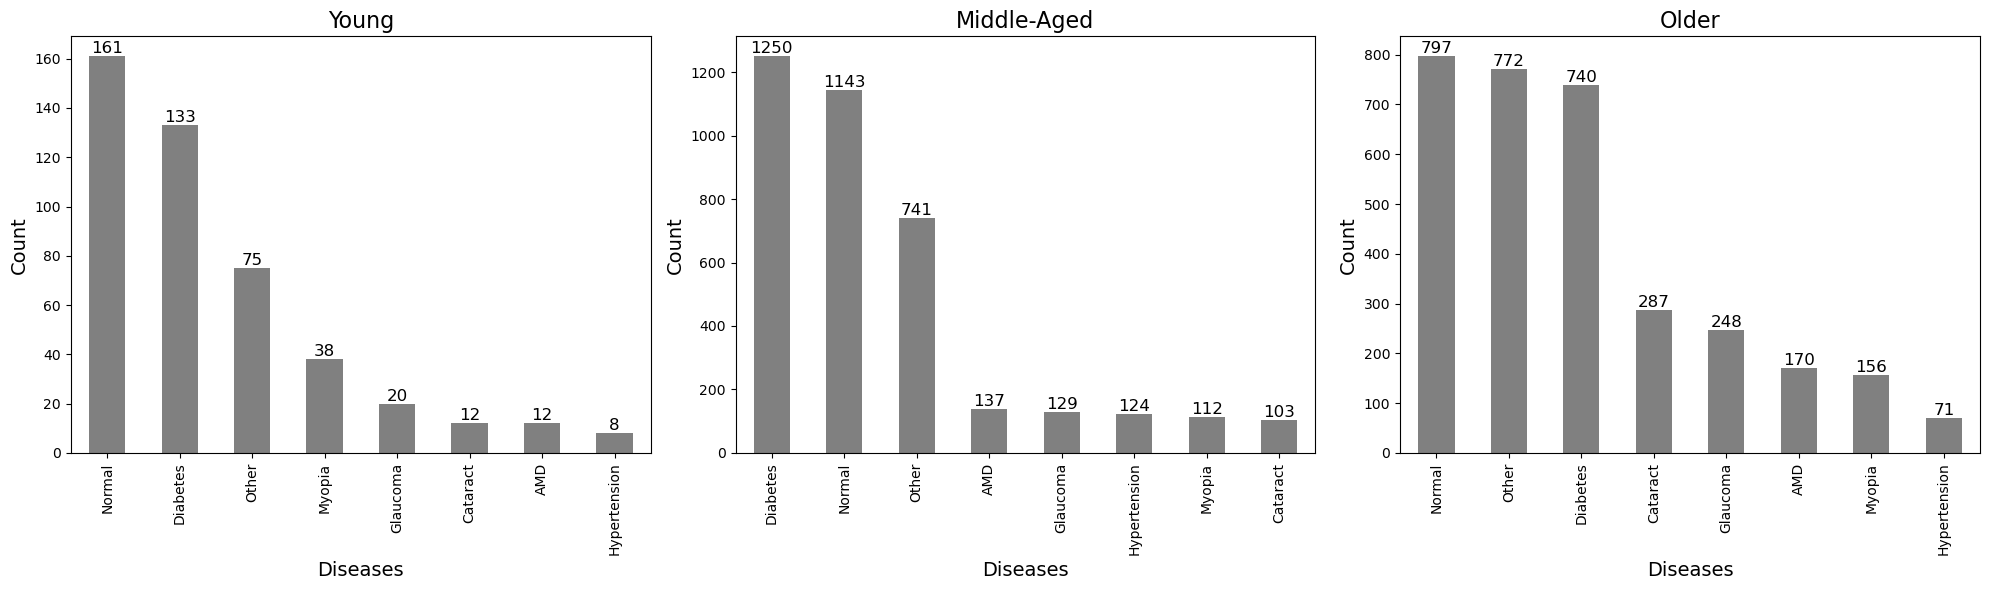

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age groups
df['Age Group'] = pd.cut(df['Patient Age'], bins=[0, 40, 60, 100], labels=['Young', 'Middle-Aged', 'Older'])

# Use full disease names instead of abbreviations
# Mapping of original column names to full disease names
column_rename_mapping = {
    'N': 'Normal',
    'C': 'Cataract',
    'D': 'Diabetes',
    'G': 'Glaucoma',
    'A': 'AMD',
    'H': 'Hypertension',
    'M': 'Myopia',
    'O': 'Other'
}

# Rename columns in the DataFrame
df = df.rename(columns=column_rename_mapping)

# List of full disease names after renaming
disease_columns = ['Normal', 'Cataract', 'Diabetes', 'Glaucoma', 'AMD', 'Hypertension', 'Myopia', 'Other']

# Group by age group and sum the occurrences of each disease
age_group_diseases = df.groupby('Age Group')[disease_columns].sum()

# Plot separate charts for each age group (Young, Middle-Aged, Older) in descending order
age_groups = ['Young', 'Middle-Aged', 'Older']

fig, ax = plt.subplots(1, 3, figsize=(20, 6))  # 3 side-by-side plots

for i, group in enumerate(age_groups):
    # Sort diseases in descending order of occurrence within the age group
    sorted_diseases = age_group_diseases.loc[group].sort_values(ascending=False)
    
    # Plot the sorted diseases
    sorted_diseases.plot(kind='bar', ax=ax[i], color='gray')
    ax[i].set_title(f'{group}', fontsize=16)
    ax[i].set_xlabel('Diseases', fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)

    # Adding count labels on each bar
    for container in ax[i].containers:
        ax[i].bar_label(container, fontsize=12)

plt.tight_layout()
plt.show()


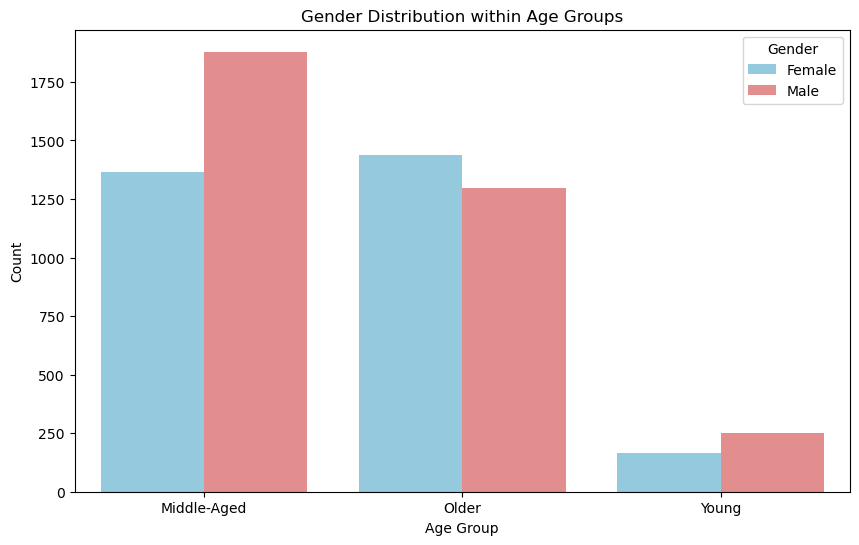

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of patients in each age group
age_group_counts = df['Age Group'].value_counts().sort_values(ascending=False)

# Sort the 'Age Group' column in the same order as the counts
ordered_age_groups = age_group_counts.index

# Plot the countplot with age groups ordered in descending order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group', hue='Patient Sex', palette=['skyblue', 'lightcoral'], order=ordered_age_groups)
plt.title('Gender Distribution within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


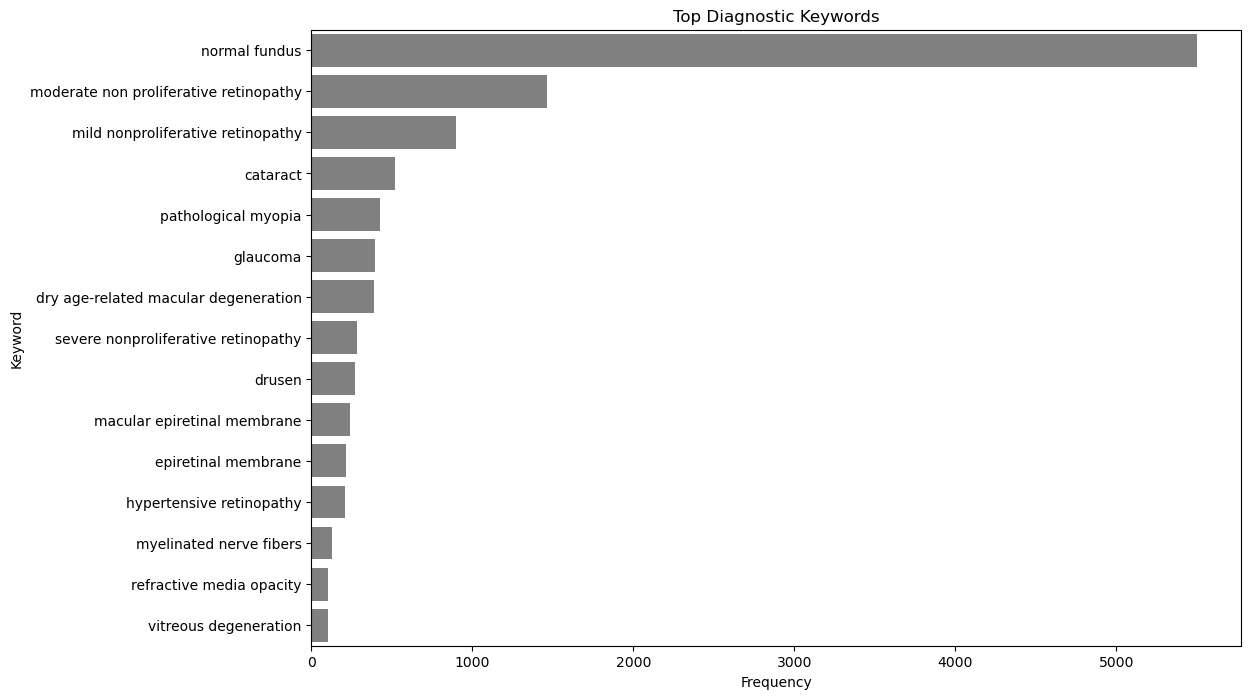

In [18]:
from collections import Counter

# Combine both keyword columns into one list
all_keywords = df['Left-Diagnostic Keywords'].tolist() + df['Right-Diagnostic Keywords'].tolist()

# Count the occurrences of each keyword
keyword_counts = Counter(all_keywords).most_common(15)  # Get top 15 keywords

# Convert to DataFrame for plotting
keyword_df = pd.DataFrame(keyword_counts, columns=['Keyword', 'Frequency'])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=keyword_df, x='Frequency', y='Keyword', color='gray')
plt.title('Top Diagnostic Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()
